In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
#Reading data from CSV file
relativeFilePath = 'DataSet/Diabetes.csv' 
data = pd.read_csv(relativeFilePath)
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


numpy.int64

In [12]:
for i in range(0,data['Outcome'].shape[0]) :
    if data['Outcome'][i] == 0:
        data['Outcome'][i] = -1

C:\Users\DELL\AppData\Local\Temp\ipykernel_9280\744117949.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Outcome'][i] = -1


In [14]:
#Separating features and labels
features = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
labels = data[['Outcome']]

In [15]:
scaler = preprocessing.StandardScaler().fit(features)
scaledFeatures = scaler.transform(features)
scaledFeatureDf = pd.DataFrame(data = scaledFeatures, columns = features.columns)
scaledFeatureDf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,3.614007e-18,-1.327244e-17,7.994184e-17,-3.556183e-17,2.295979e-16,2.462585e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


In [16]:
#singular vectors using eigen values of Xtranspos*X
# Xtranspose = scaledFeatures.transpose()
# correlationMatrix = np.matmul(Xtranspose,scaledFeatures)
# eigenValues, eigenVectors = np.linalg.eig(correlationMatrix)

In [17]:
#Finding Singular Value Decomposition, and also ensuring correctness by obtaining original matrix from SVD
leftSingularVectors,singularValues,rightSingularVectors = np.linalg.svd(scaledFeatures, full_matrices=True)
original = np.dot(leftSingularVectors[:,:8]*singularValues,rightSingularVectors)
np.allclose(original,scaledFeatures)

True

In [18]:
transposedRSV = rightSingularVectors.transpose()
transposedRSV

array([[-0.1284321 ,  0.59378583, -0.01308692,  0.08069115, -0.47560573,
         0.19359817,  0.58879003,  0.11784098],
       [-0.39308257,  0.17402908,  0.46792282, -0.40432871,  0.46632804,
         0.09416176,  0.06015291,  0.45035526],
       [-0.36000261,  0.18389207, -0.53549442,  0.05598649,  0.32795306,
        -0.6341159 ,  0.19211793, -0.01129554],
       [-0.43982428, -0.33196534, -0.2376738 ,  0.03797608, -0.48786206,
         0.00958944, -0.28221253,  0.5662838 ],
       [-0.43502617, -0.25078106,  0.33670893, -0.34994376, -0.34693481,
        -0.27065061,  0.13200992, -0.54862138],
       [-0.45194134, -0.1009598 , -0.36186463,  0.05364595,  0.25320376,
         0.68537218,  0.03536644, -0.34151764],
       [-0.27061144, -0.122069  ,  0.43318905,  0.8336801 ,  0.11981049,
        -0.08578409,  0.08609107, -0.00825873],
       [-0.19802707,  0.62058853,  0.07524755,  0.0712006 , -0.10928996,
        -0.03335717, -0.71208542, -0.21166198]])

In [19]:
#The first two components will be the priciple components we will be using.
pcaDataFrame = pd.DataFrame()
pcaDataFrame['FirstComp'] = transposedRSV[0]
pcaDataFrame['SecondComp'] = transposedRSV[1]

,0,1
count,7.680000e+02,7.680000e+02
mean,2.579678e-16,7.314751e-17
std,9.256884e-01,8.971331e-01
min,-2.679109e+00,-2.769380e+00
25%,-6.262137e-01,-5.889392e-01
50%,-1.372840e-01,-7.106232e-02
75%,5.341217e-01,5.634876e-01
max,5.780690e+00,4.473754e+00


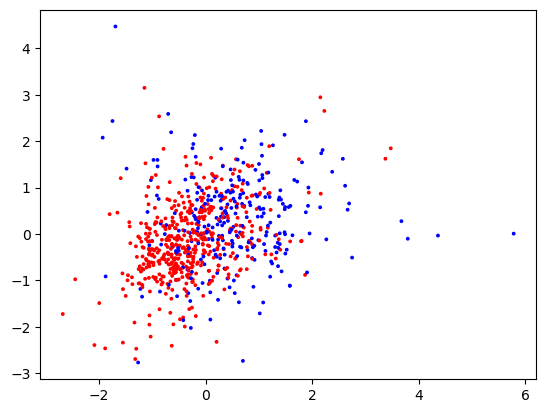

In [21]:
#Plotting The two dimensional data projected on the two principle components. Do we need to scale these features here again?
twoDData = np.dot(scaledFeatures,pcaDataFrame.to_numpy())
colors = {-1:'red',1:'blue'}
plt.scatter(twoDData[:,0], twoDData[:,1],s=3, c = labels['Outcome'].map(colors))
y = labels.to_numpy()
pd.DataFrame(twoDData).describe()

In [22]:
x_train, x_test, y_train, y_test = train_test_split(twoDData, y, train_size=0.8, shuffle=True, stratify=y)

In [23]:
y_train.shape

(614, 1)

In [24]:
def getLossAndGradient(w,x,y,regularizer):
    numberOfDataPoints = x.shape[0]
    xw = np.dot(x,w)
    loss = np.dot((y-xw).T,(y-xw)).item()/2*numberOfDataPoints
    grad = (np.dot(x.T, (y-xw)))/numberOfDataPoints - regularizer*w
    return loss, grad

In [25]:
def steepestDescentLineSearch(w, x, y, regularizer,epsilon = 1e-07, max_epochs=500, gamma = 1e-07):
    loss, grad = getLossAndGradient(w,x,y,regularizer)
    numberOfEpochs = 0
    while(numberOfEpochs<max_epochs and np.linalg.norm(grad)>epsilon):
        learningRate = 1
        w_new = w + learningRate*grad # We are actually moving in opposite direction of gradient, getLossAndGradient actually returns -grad
        #print("Iteration : ",numberOfEpochs," w : ",w," Loss : ",loss)
        new_loss, new_grad = getLossAndGradient(w_new,x,y,regularizer)
        
        #Line search for Learning Rate
        while(new_loss>loss - gamma*learningRate*np.dot(grad.T,grad)):
            learningRate = learningRate/2
            w_new = w + learningRate*grad
            new_loss, new_grad = getLossAndGradient(w_new,x,y,regularizer)
        w = w_new
        #print('learning rate used : ',learningRate)
        loss = new_loss
        grad = new_grad
        numberOfEpochs += 1
    #print("total epochs needed : ",numberOfEpochs)
    return w

In [26]:
w_learned = steepestDescentLineSearch(np.array([2,-1]),x_train, y_train[:,0], 0.9)
w_learned

array([0.27403542, 0.00028958])

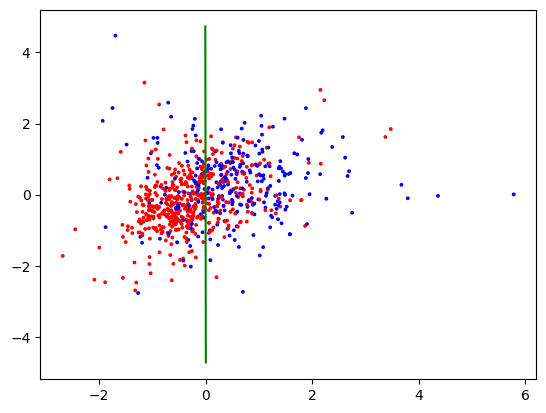

In [37]:
xax = np.arange(-0.005,0.005,0.00001)
yax = (-w_learned[0]/w_learned[1])*xax + (0.0/w_learned[1])

plt.scatter(twoDData[:,0], twoDData[:,1],s=3, c = labels['Outcome'].map(colors))
plt.plot(xax,yax,c='green')

In [38]:
pred = np.dot(x_test, w_learned)
accuracy = np.sum([1 if pred[i]*y_test[i] >= 0 else 0 for i in range(len(pred))])/len(pred)
print("Accuracy =",accuracy*100)

Accuracy = 77.92207792207793


In [19]:
#K-fold cross validation

numberOfFolds = 5
totalDataPoints = x_train.shape[0]
DataPointsInOneFold = totalDataPoints//numberOfFolds
foldStartIndex = np.zeros(numberOfFolds)
foldEndIndex = np.zeros(numberOfFolds)

for i in range(0,numberOfFolds):
    foldName = 'fold'+str(1)
    fsi = i*DataPointsInOneFold
    fei = (i+1)*DataPointsInOneFold - 1
    if i==numberOfFolds-1:
        fei = totalDataPoints-1
    foldStartIndex[i] = fsi
    foldEndIndex[i] = fei

In [27]:
np.concatenate((x_train[0:0,:],x_train[4:4,:]),axis=0)
x_train[0:4,:]

array([[ 0.2278038 , -0.19084503],
       [-0.81943324, -0.12444706],
       [ 0.0579723 ,  0.1891487 ],
       [-0.41242351,  0.67616162]])

In [28]:
trainingData = x_train[0:0,:]
np.concatenate((trainingData,x_train[3:5,:]),axis=0)

array([[-0.41242351,  0.67616162],
       [ 0.60236   ,  1.60296423]])

In [29]:
rangeOfRegularizer = np.arange(-20,20,0.5)
bestReg = rangeOfRegularizer[0]
maxValidationAcc = 0
for reg in rangeOfRegularizer:
    accuracyOfReg = 0
    for testFold in range(0,numberOfFolds):
        trainingData_x = x_train[0:0,:]
        trainingData_y = y_train[0:0,:]
        validationData_x = x_train[0:0,:]
        validationData_y = y_train[0:0,:]
        for eachFold in range(0,numberOfFolds):
            if eachFold!=testFold:
                trainingData_x = np.concatenate((trainingData_x,x_train[foldStartIndex[eachFold]:foldEndIndex[eachFold],:]),axis=0)
                trainingData_y = np.concatenate((trainingData_y,y_train[foldStartIndex[eachFold]:foldEndIndex[eachFold],:]),axis=0)
            else:
                validationData_x = np.concatenate((validationData_x,x_train[foldStartIndex[eachFold]:foldEndIndex[eachFold],:]),axis=0)
                validationData_y = np.concatenate((validationData_y,y_train[foldStartIndex[eachFold]:foldEndIndex[eachFold],:]),axis=0)
        
        w_learned = steepestDescentLineSearch(np.array([2,3]),x_train, y_train[:,0], 0.9)
            
        

NameError: name 'validationData' is not defined

In [51]:
122*5

610